### **Problem Statement:**
Financial threats are displaying a trend about the credit risk of commercial banks as the incredible improvement in the financial industry has arisen. In this way, one of the The biggest threats faced by commercial banks is the risk prediction of credit clients. The goal is to predict the probability of credit default based on credit card owner's characteristics and payment history.

### **Approach:**
The classical machine learning tasks like Data Exploration, Data Cleaning,
Feature Engineering, Model Building and Model Testing. Try out different machine
learning algorithms that’s best fit for the above case.

### **Results:**
You have to build a **solution that should able to predict the probability of credit default** based on credit card owner’s characteristics and payment history.

### **Importing Libraries**

In [111]:
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns

# Machine Learning Algorithms
from sklearn.linear_model import LogisticRegression as lr
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Splitting the dependent and independent variables
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

# Performance Evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Timing the algorithm
import time
import datetime

In [112]:
df = pd.read_csv('/content/UCI_Credit_Card.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


### **Renaming columns for better readability**

In [113]:
rename_columns = {'default.payment.next.month':'Next_Month_Default',
                  'LIMIT_BAL':'Limit_Bal','SEX':'Sex','EDUCATION':'Education','MARRIAGE':'Marital_Status','AGE':'Age', 
                  'PAY_0':'As_on_Sep_05','PAY_2':'As_on_Aug_05', 'PAY_3':'As_on_Jul_05', 'PAY_4':'As_on_Jun_05', 'PAY_5':'As_on_May_05','PAY_6':'As_on_Apr_05',
                  'BILL_AMT1':'Bill_Sep_05','BILL_AMT2':'Bill_Aug_05', 'BILL_AMT3':'Bill_Jul_05', 'BILL_AMT4':'Bill_Jun_05', 'BILL_AMT5':'Bill_May_05','BILL_AMT6':'Bill_Apr_05',
                  'PAY_AMT1':'Due_Sep_05', 'PAY_AMT2':'Due_Aug_05', 'PAY_AMT3':'Due_Jul_05', 'PAY_AMT4':'Due_Jun_05', 'PAY_AMT5':'Due_May_05','PAY_AMT6':'Due_Apr_05'}

df.rename(columns=rename_columns, inplace=True)
df.columns
df.head()

,ID,Limit_Bal,Sex,Education,Marital_Status,Age,As_on_Sep_05,As_on_Aug_05,As_on_Jul_05,As_on_Jun_05,...,Bill_Jun_05,Bill_May_05,Bill_Apr_05,Due_Sep_05,Due_Aug_05,Due_Jul_05,Due_Jun_05,Due_May_05,Due_Apr_05,Next_Month_Default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### **Exploratory Data Analysis**

#### **Frequency distribution of Limit_Bal**

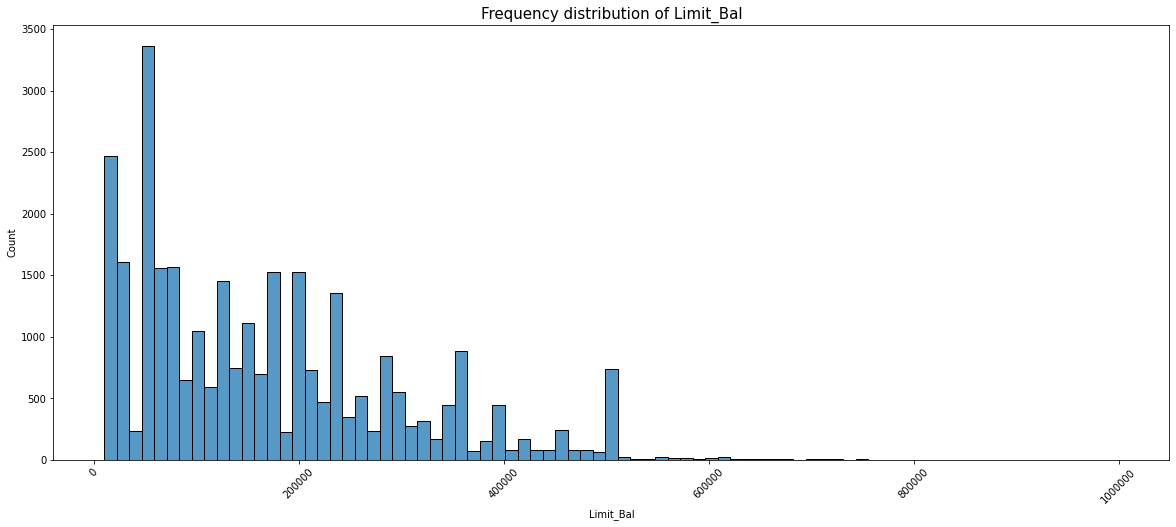

In [114]:
plt.figure(figsize=(20,8))
plt.title('Frequency distribution of Limit_Bal', size=15)
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
sns.histplot(df['Limit_Bal'])
plt.show()

In [115]:
df['Limit_Bal'].unique()
pd.DataFrame(df['Limit_Bal'].value_counts())

,Limit_Bal
50000.0,3365
20000.0,1976
30000.0,1610
80000.0,1567
200000.0,1528
...,...
730000.0,2
1000000.0,1
327680.0,1
760000.0,1


#### **Frequency distribution of Age**

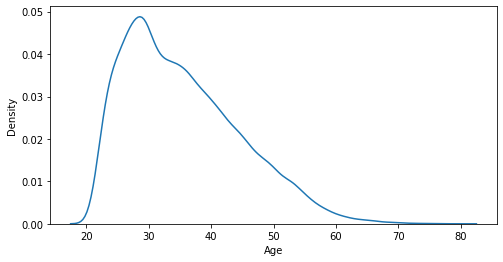

In [116]:
plt.figure(figsize=(8,4))
sns.kdeplot(df['Age'])
plt.show()

#### **Target Variable Distribution**

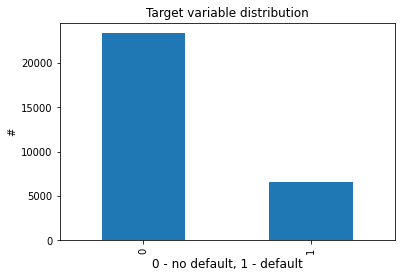

In [117]:
df['Next_Month_Default'].value_counts().plot(kind='bar')
plt.title('Target variable distribution', size=12)
plt.xlabel('0 - no default, 1 - default', size=12)
plt.ylabel('#')
plt.show()

* The number of non-defaults is substantially greater than the number of defaults. This tells that we have an *imbalanced dataset*

#### **Aggregating by Gender**

In [118]:
g = df.copy()

g = g.groupby(['Sex','Next_Month_Default']).size().reset_index()
g.rename(columns=({0:'Count'}), inplace=True)
g['Sex'] = g['Sex'].map({1:'Male', 2:'Female'})
g['Next_Month_Default'] = g['Next_Month_Default'].map({0:'Non-Default', 1:'Default'})
pd.DataFrame(pd.pivot_table(data=g, index='Sex', columns='Next_Month_Default', values='Count')).reset_index()

Next_Month_Default,Sex,Default,Non-Default
0,Female,3763,14349
1,Male,2873,9015


#### **Aggregating by Marital Status**

In [119]:
m_df = df.copy()

m_df['Marital_Status'] = m_df['Marital_Status'].map({1:'Married', 2:'Single', 3:'Others', 0:'Undefined'})
m_df['Next_Month_Default'] = m_df['Next_Month_Default'].map({1:'Defaulter', 0:'Non-Defaulter'})
m_df = m_df.groupby(['Marital_Status', 'Next_Month_Default']).size().reset_index()
m_df.rename(columns=({0:'Count'}), inplace=True)
m_df = pd.DataFrame(pd.pivot_table(m_df, index='Marital_Status', columns='Next_Month_Default', values='Count')).reset_index()
m_df

Next_Month_Default,Marital_Status,Defaulter,Non-Defaulter
0,Married,3206,10453
1,Others,84,239
2,Single,3341,12623
3,Undefined,5,49


#### **Aggregating by Education**

In [120]:
edu = df.copy()

edu['Education'] = edu['Education'].map({1:'Graduate School', 2:'University', 3:'High School', 4:'Others', 5:'Unknown', 6:'Unknown'})
edu['Next_Month_Default'] = edu['Next_Month_Default'].map({1:'Defaulter', 0:'Non-Defaulter'})
edu = pd.DataFrame(edu.groupby(['Education', 'Next_Month_Default']).size())
edu.rename(columns=({0:'Count'}), inplace=True)
pd.pivot_table(data=edu, index='Education', columns='Next_Month_Default', values='Count').reset_index()

Next_Month_Default,Education,Defaulter,Non-Defaulter
0,Graduate School,2036,8549
1,High School,1237,3680
2,Others,7,116
3,University,3330,10700
4,Unknown,26,305


#### **Aggregating by Age**

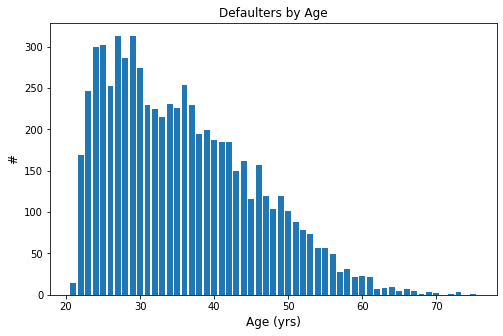

In [121]:
a = df.copy()
a = pd.DataFrame(a.groupby(['Age', 'Next_Month_Default']).size()).reset_index()
a.rename(columns=({0:'Count'}), inplace=True)
a = pd.pivot_table(data=a, index='Age', columns='Next_Month_Default', values='Count', aggfunc='sum').reset_index()
a.rename(columns=({0:'Non-Default', 1:'Default'}), inplace=True)

plt.figure(figsize=(8,5))
plt.xlabel('Age (yrs)', size=12)
plt.ylabel('#', size=12)
plt.bar(a['Age'], a['Default'])
plt.title('Defaulters by Age')
plt.show()

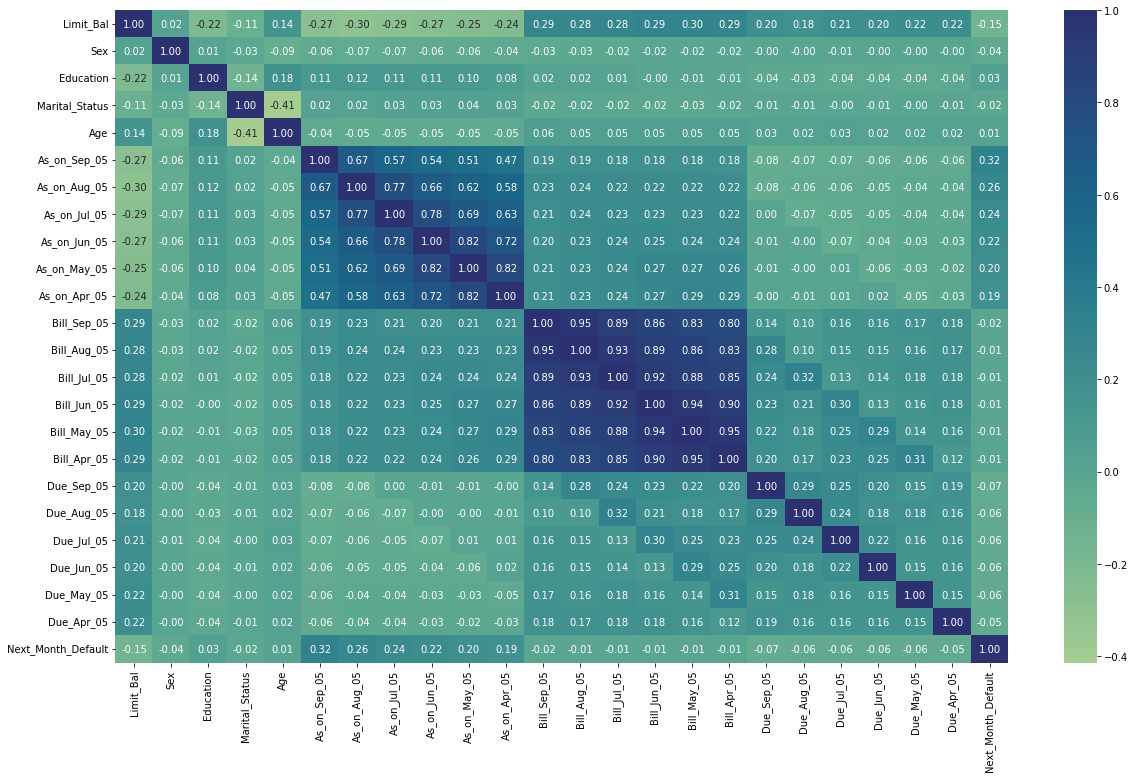

In [122]:
plt.figure(figsize=(20,12))
sns.heatmap(df.drop('ID', axis=1).corr(), annot=True, cmap='crest', fmt='.2f')
plt.show()

In [123]:
# Independent variables
x = df.iloc[:,:-1].drop('ID', axis=1)

# Dependent variables
y = df.iloc[:,-1]

### **Logistic Regression**

(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

In [124]:
# starting time
start = datetime.datetime.now()

lrdf = df.copy()

# Splitting the dataset into dependent and independent variable
lr_x = x.copy()
lr_y = y.copy()

# Splitting the dataset into training and testing set
lr_x_train, lr_x_test, lr_y_train, lr_y_test = train_test_split(lr_x, lr_y, test_size=0.2, random_state=42)

# Feature Scaling using StandardScaler
ss_lr = StandardScaler()
lr_x_train_scaled = ss_lr.fit_transform(lr_x_train)
lr_x_test_scaled = ss_lr.transform(lr_x_test)

# Initializing the model
lr_model = lr(penalty='l1', C=100, solver='liblinear', multi_class='auto', verbose=0,  random_state=42)

# fitting the model to the dataset
lr_model.fit(lr_x_train_scaled, lr_y_train)

# Predicting the test data
lr_y_pred = lr_model.predict(lr_x_test_scaled)

lr_acc = round(lr_model.score(lr_x_test_scaled, lr_y_test),3)
train_score = round(lr_model.score(lr_x_train_scaled, lr_y_train), 3)
test_score = round(lr_model.score(lr_x_test_scaled, lr_y_test), 3)
auroc = round(roc_auc_score(lr_y_test, lr_y_pred),3)
running = datetime.datetime.now()-start

results_logreg = pd.DataFrame({'Model':'Logistic Regression', 'Train_Score':train_score, 'Test_Score':test_score, 'AUROC':auroc, 'Time':running}, index=[0])
results_logreg

importance = lr_model.coef_[0]
imp_lr = dict()

for k,v in (enumerate(importance)):
  k = k
  v = v
  imp_lr.update({k:v})

##### **Feature Importances - Logistic Regression**

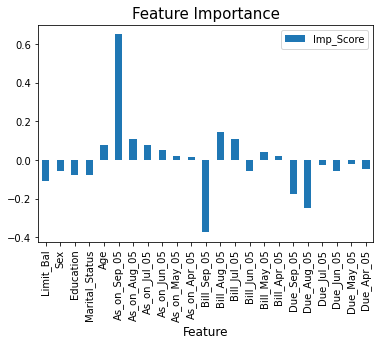

<Figure size 720x360 with 0 Axes>

In [125]:
imp_lr = pd.DataFrame(pd.concat([pd.Series(imp_lr.values()), pd.Series(lr_x.columns)], axis=1))
imp_lr = imp_lr[[1,0]]
imp_lr.columns=['Feature', 'Imp_Score']
imp_lr.sort_values(by='Imp_Score', ascending=False).set_index('Feature', inplace=True)
imp_lr.set_index('Feature').plot(kind='bar')
plt.title('Feature Importance', size=15)
plt.xlabel('Feature', size=12)
plt.figure(figsize=(10,5))
plt.show()

### **Support Vector Classifier**

(penalty='l2', loss='squared_hinge', *, dual=True, tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)

In [126]:
# starting time
start = datetime.datetime.now()

sv_x = x.copy()
sv_y = y.copy()

sv_x_train, sv_x_test, sv_y_train, sv_y_test = train_test_split(sv_x, sv_y, test_size=0.2, random_state=42)

sv_ss = StandardScaler()
sv_x_train_scaled = sv_ss.fit_transform(sv_x_train)
sv_x_test_scaled = sv_ss.transform(sv_x_test)

svm = LinearSVC(penalty='l1', C=10, max_iter=1000, dual=False)
svm.fit(sv_x_train_scaled, sv_y_train)
sv_y_pred = svm.predict(sv_x_test_scaled)

train_score = round(svm.score(sv_x_test_scaled, sv_y_test),3)
test_score = round(svm.score(sv_x_train_scaled, sv_y_train),3)
auroc = round(roc_auc_score(sv_y_test, sv_y_pred),3)
running_time = (datetime.datetime.now() - start)

result_svc = pd.DataFrame({'Model':'Support Vector Classifier','Train_Score':train_score, 'Test_Score':test_score,'AUROC':auroc, 'Time':running_time}, index=[0])

imp_svc = dict()
for k,v in enumerate(svm.coef_[0]):
  k = k
  v = v
  imp_svc.update({k:v})

##### **Feature Importances - SVC**

In [127]:
imp_svc = pd.DataFrame(pd.concat([pd.Series(imp_svc.values()), pd.Series(sv_x.columns)], axis=1))
imp_svc = imp_svc[[1, 0]].rename(columns=({0:'Imp_Score', 1:'Feature'}))
imp_svc = imp_svc.sort_values(by='Imp_Score', ascending=False)
imp_svc

,Feature,Imp_Score
5,As_on_Sep_05,0.222311
6,As_on_Aug_05,0.050665
4,Age,0.029593
13,Bill_Jul_05,0.027660
7,As_on_Jul_05,0.025499
12,Bill_Aug_05,0.024274
8,As_on_Jun_05,0.017758
9,As_on_May_05,0.008672
15,Bill_May_05,0.007058
10,As_on_Apr_05,0.004582


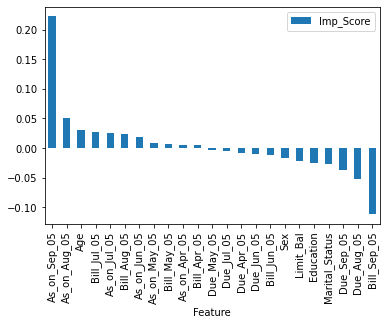

In [128]:
imp_svc.set_index('Feature').plot(kind='bar')
plt.show()

### **KNN Classifier**

(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

In [129]:
# starting time
start = datetime.datetime.now()

# splitting dataset into train and test set
knn_x = x.copy()
knn_y = y.copy()

knn_x_train, knn_x_test, knn_y_train, knn_y_test = train_test_split(knn_x, knn_y, test_size=0.2, random_state=42)

# Feature Scaling
ss_knn = StandardScaler()
knn_x_train_scaled = ss_knn.fit_transform(knn_x_train)
knn_x_test_scaled = ss_knn.transform(knn_x_test)

# Initiating the model
knn = KNeighborsClassifier(n_neighbors=5,
                           algorithm='auto', 
                           n_jobs=-1)

# fitting the model to the dataset
knn.fit(knn_x_train_scaled, knn_y_train)

# predicting the test dataset
knn_y_pred = knn.predict(knn_x_test_scaled)

Train_Score = round(knn.score(knn_x_train_scaled, knn_y_train),3)
Test_Score = round(knn.score(knn_x_test_scaled, knn_y_test),3)
auroc = round(roc_auc_score(knn_y_test, knn_y_pred),3)
Running = (datetime.datetime.now() - start)

results_knn = pd.DataFrame({'Model':'KNN Classifier','Train_Score':Train_Score, 'Test_Score':Test_Score, 'AUROC':auroc,'Time':Running}, index=[0])
results_knn

,Model,Train_Score,Test_Score,AUROC,Time
0,KNN Classifier,0.841,0.795,0.637,0 days 00:00:30.861655


### **Decision Tree Classifier**

(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

In [130]:
start = datetime.datetime.now()

dt_x = x.copy()
dt_y = y.copy()

dt_x_train, dt_x_test, dt_y_train, dt_y_test = train_test_split(dt_x, dt_y, test_size=0.2, random_state=42)

ss_dt = StandardScaler()
dt_x_train_scaled = ss_dt.fit_transform(dt_x_train)
dt_x_test_scaled = ss_dt.transform(dt_x_test)

dt_model = DecisionTreeClassifier(criterion = 'gini', 
                             splitter = 'best', 
                             max_depth = 6, 
                             min_samples_split = 2, 
                             min_samples_leaf = 1,
                             random_state = 42)

dt_model.fit(dt_x_train_scaled, dt_y_train)

dt_y_pred = dt_model.predict(dt_x_test_scaled)

Train_Score = round(dt_model.score(dt_x_train_scaled, dt_y_train),3)
Test_Score = round(dt_model.score(dt_x_test_scaled, dt_y_test),3)
auroc = round(roc_auc_score(dt_y_test, dt_y_pred),3)
Running = datetime.datetime.now() - start

results_dt = pd.DataFrame({'Model':'Decision Tree Classifier', 'Train_Score':Train_Score, 'Test_Score':Test_Score,'AUROC':auroc ,'Time':Running}, index=[0])

imp_dt = dict()
for k,v in enumerate(dt_model.feature_importances_):
  k = k
  v = v
  imp_dt.update({k:v})

##### **Feature Importance - Decision Tree Classifier**

In [131]:
imp_dt = pd.DataFrame(pd.concat([pd.Series(imp_dt.values()), pd.Series(dt_x.columns)], axis=1)).rename(columns=({0:'Imp_Score', 1:'Feature'}))
imp_dt = imp_dt[['Feature','Imp_Score']].sort_values(by='Imp_Score', ascending=False)
imp_dt

,Feature,Imp_Score
5,As_on_Sep_05,0.658187
6,As_on_Aug_05,0.135074
19,Due_Jul_05,0.053598
11,Bill_Sep_05,0.025567
9,As_on_May_05,0.025136
7,As_on_Jul_05,0.021300
0,Limit_Bal,0.013633
2,Education,0.009252
10,As_on_Apr_05,0.008067
20,Due_Jun_05,0.007376


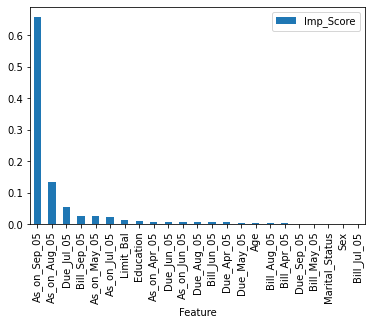

In [132]:
imp_dt.set_index('Feature').plot(kind='bar')
plt.show()

### **Random Forest Classifier**

In [133]:
start = datetime.datetime.now()

rf_x = x.copy()
rf_y = y.copy()

rf_x_train, rf_x_test, rf_y_train, rf_y_test = train_test_split(rf_x, rf_y, test_size=0.2, random_state=42)

ss_rf = StandardScaler()
rf_x_train_scaled = ss_rf.fit_transform(rf_x_train)
rf_x_test_scaled = ss_rf.transform(rf_x_test)

rf_model = RandomForestClassifier(n_jobs=-1, max_depth=6)
rf_model.fit(rf_x_train_scaled, rf_y_train)
rf_y_pred = rf_model.predict(rf_x_test_scaled)

train_score = round(rf_model.score(rf_x_train_scaled, rf_y_train),3)
test_score = round(rf_model.score(rf_x_test_scaled, rf_y_test),3)
auroc = round(roc_auc_score(rf_y_test, rf_y_pred),3)
running = datetime.datetime.now()-start

results_rf = pd.DataFrame({'Model':'Random Forest Classifier','Train_Score':train_score, 'Test_Score':test_score, 'AUROC':auroc, 'Time':running}, index=[0])

imp_rf = dict()
for k,v in enumerate(rf_model.feature_importances_):
  k = k
  v = v
  imp_rf.update({k:v})

#### **Feature Importances - Random Forest  Classifier**

In [134]:
imp_rf = pd.concat([pd.Series(rf_model.feature_importances_), pd.Series(rf_x_train.columns)], axis=1).rename(columns=({0:'Score', 1:'Feature'}))
imp_rf = imp_rf[['Feature', 'Score']]
imp_rf

,Feature,Score
0,Limit_Bal,0.025011
1,Sex,0.000933
2,Education,0.003075
3,Marital_Status,0.001457
4,Age,0.007547
5,As_on_Sep_05,0.352924
6,As_on_Aug_05,0.146811
7,As_on_Jul_05,0.091114
8,As_on_Jun_05,0.087378
9,As_on_May_05,0.056065


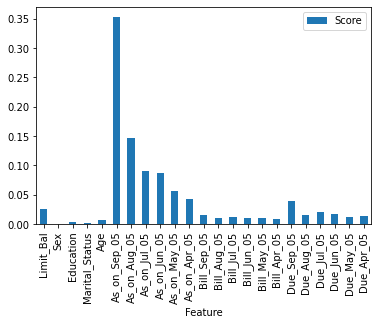

In [135]:
imp_rf.set_index('Feature').plot(kind='bar')
plt.show()

### **Model Evaluation**

In [136]:
results = (((results_logreg.append(results_dt)).append(result_svc)).append(results_rf)).append(results_knn).reset_index().drop('index', axis=1)
results.sort_values(by='AUROC', ascending=False)

,Model,Train_Score,Test_Score,AUROC,Time
1,Decision Tree Classifier,0.828,0.818,0.661,0 days 00:00:00.257411
3,Random Forest Classifier,0.827,0.820,0.648,0 days 00:00:02.593967
4,KNN Classifier,0.841,0.795,0.637,0 days 00:00:30.861655
0,Logistic Regression,0.811,0.810,0.603,0 days 00:00:00.774326
2,Support Vector Classifier,0.802,0.802,0.572,0 days 00:00:00.689192


In [137]:
feature_imps = pd.merge(imp_lr, imp_svc, on='Feature', how='inner').rename(columns=({'Imp_Score_x':'Log Reg', 'Imp_Score_y':'SVC'}))
feature_imps = pd.merge(feature_imps, imp_dt, on='Feature', how='inner').rename(columns=({'Imp_Score':'DTC'}))
feature_imps = pd.merge(feature_imps, imp_rf, on='Feature', how='inner').rename(columns=({'Score':'RF'}))
feature_imps.style.highlight_max(color = 'lightgreen', axis = 0, subset=['Log Reg', 'SVC', 'DTC', 'RF'])

,Feature,Log Reg,SVC,DTC,RF
0,Limit_Bal,-0.106431,-0.022783,0.013633,0.025011
1,Sex,-0.056172,-0.017360,0.000000,0.000933
2,Education,-0.077681,-0.025753,0.009252,0.003075
3,Marital_Status,-0.079159,-0.026336,0.001295,0.001457
4,Age,0.076885,0.029593,0.003864,0.007547
5,As_on_Sep_05,0.649234,0.222311,0.658187,0.352924
6,As_on_Aug_05,0.108497,0.050665,0.135074,0.146811
7,As_on_Jul_05,0.077494,0.025499,0.021300,0.091114
8,As_on_Jun_05,0.052806,0.017758,0.007347,0.087378
9,As_on_May_05,0.020702,0.008672,0.025136,0.056065
